# Reconstructions: Paganin vs Contrast Transfer Function (CTF)

In [1]:
%matplotlib notebook
import numpy as np
from scipy.misc import face
import matplotlib.pyplot as plt
from pynx.wavefront import *

### Image parameters
Depending on the parameters - whether this corresponds to a 'weak phase object' or not- the CTF can be better than the Paganin operator reconstruction, or do not work at all.

Try with the parameters below, and change the thickness from 1e-8 to 3e-8 and 1e-7 and see how the two reconstructions perform, in resolution and contrast

In [2]:
# Material properties
nrj_ev = 20000
wavelength=12398.4e-10/nrj_ev
try:
    import xraydb
    material , density = xraydb.get_material('Al')
    delta,beta, atten = xraydb.xray_delta_beta(material, density, nrj_ev)
    print("%15s: delta=%6e  beta=%6e  delta/beta=%6.1f"%(material, delta, beta, delta/beta))
except:
    delta, beta = 1.354980e-06, 3.971649e-09

thickness = 1e-8  # base thickness, to be multiplied by image value 0..255. 
pixel_size = 1e-6
mu = 4 * np.pi * beta / wavelength
k = 2 * np.pi / wavelength
print("       mu * t = %f\nk * delta * t = %f" % (mu * thickness, k * delta * thickness))

# Propagation distance
dz = 1

# base image
d0 = face()[:,:768,0]
d0 = np.exp(k * (-1j * delta - beta) * thickness * d0)

             Al: delta=1.354980e-06  beta=3.971649e-09  delta/beta= 341.2
       mu * t = 0.000008
k * delta * t = 0.001373


## Paganin

<IPython.core.display.Javascript object>


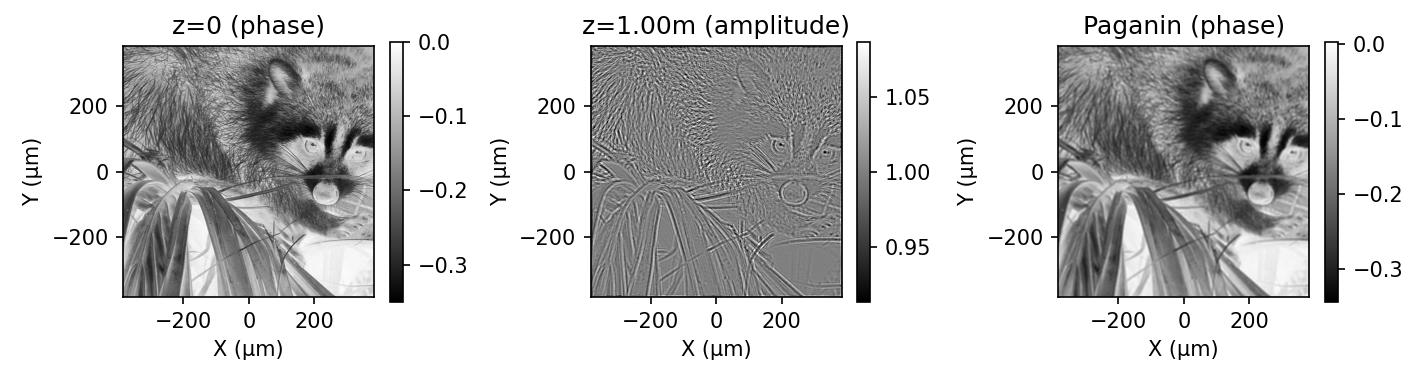

In [3]:
w = Wavefront(d=np.fft.fftshift(d0), pixel_size=pixel_size, wavelength=wavelength)

# We supply directly the 
fig, axs = plt.subplots(1,3,figsize=(9.5,2.5))

w = ImshowAngle(axes=axs[0], title="z=0 (phase)", cmap='gray') * w
w = ImshowAbs(axes=axs[1], title="z=%4.2fm (amplitude)"%dz) * PropagateNearField(dz=dz) * w
w = BackPropagatePaganin(dz=dz, delta=delta, beta=beta) * w 
w = ImshowAngle(axes=axs[2], title="Paganin (phase)", cmap='gray') * w

plt.tight_layout()

### Contrast Transfer Function

<IPython.core.display.Javascript object>


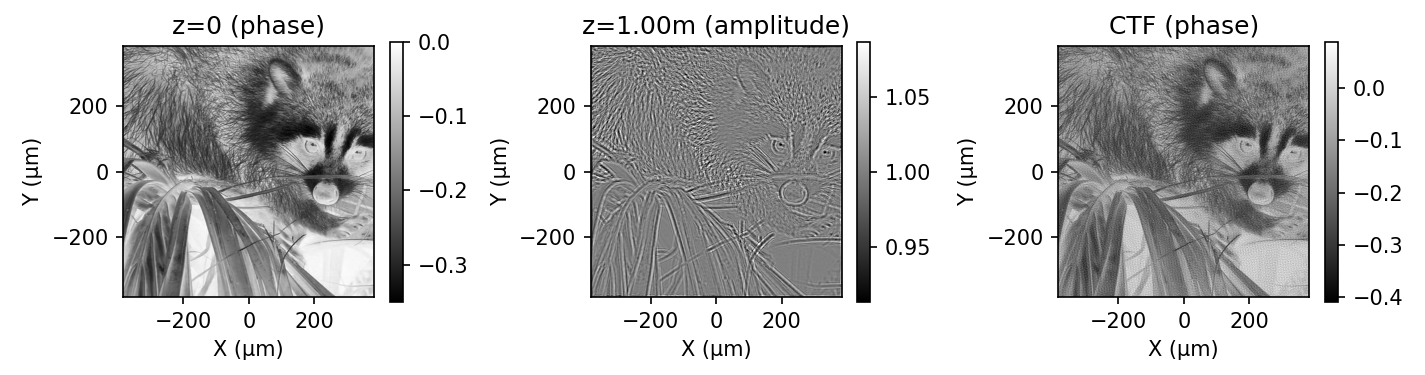

In [4]:
w = Wavefront(d=np.fft.fftshift(d0), pixel_size=pixel_size, wavelength=wavelength)

# We supply directly the 
fig, axs = plt.subplots(1,3,figsize=(9.5,2.5))

w = ImshowAngle(axes=axs[0], title="z=0 (phase)", cmap='gray') * w
w = ImshowAbs(axes=axs[1], title="z=%4.2fm (amplitude)"%dz) * PropagateNearField(dz=dz) * w
w = BackPropagateCTF(dz=dz, delta_beta=delta/beta) * w 
w = ImshowAngle(axes=axs[2], title="CTF (phase)", cmap='gray') * w

plt.tight_layout()